<a href="https://colab.research.google.com/github/muken1128/machine-learning/blob/main/decision-tree/decision_tree001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 参考
# https://qiita.com/renesisu727/items/844648d6c60e578ce944

In [4]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.5 MB/s eta 0:00:00


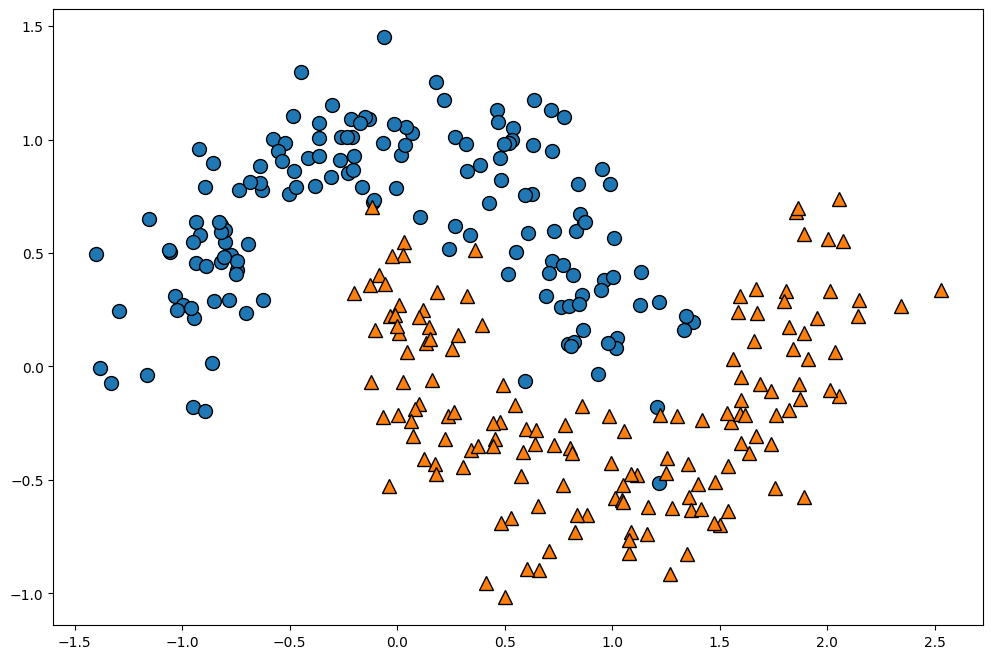

In [5]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import mglearn
import graphviz


# makemoonsは三日月状のデータを作る
moons = make_moons(n_samples=300, noise=0.2, random_state=0)

X = moons[0]
Y = moons[1]
# 訓練データとテストデータに分ける
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y)

plt.figure(figsize=(12, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.show()

In [6]:
# 決定木分類にあてはめて正確性を図る
clf_model = DecisionTreeClassifier(max_depth=3)
clf_model.fit(X_train, Y_train)
print(clf_model.score(X_test, Y_test))

0.8933333333333333


In [8]:
dot_data = export_graphviz(clf_model)
graph = graphviz.Source(dot_data)
graph.render('moon-tree', format='png')

'moon-tree.png'

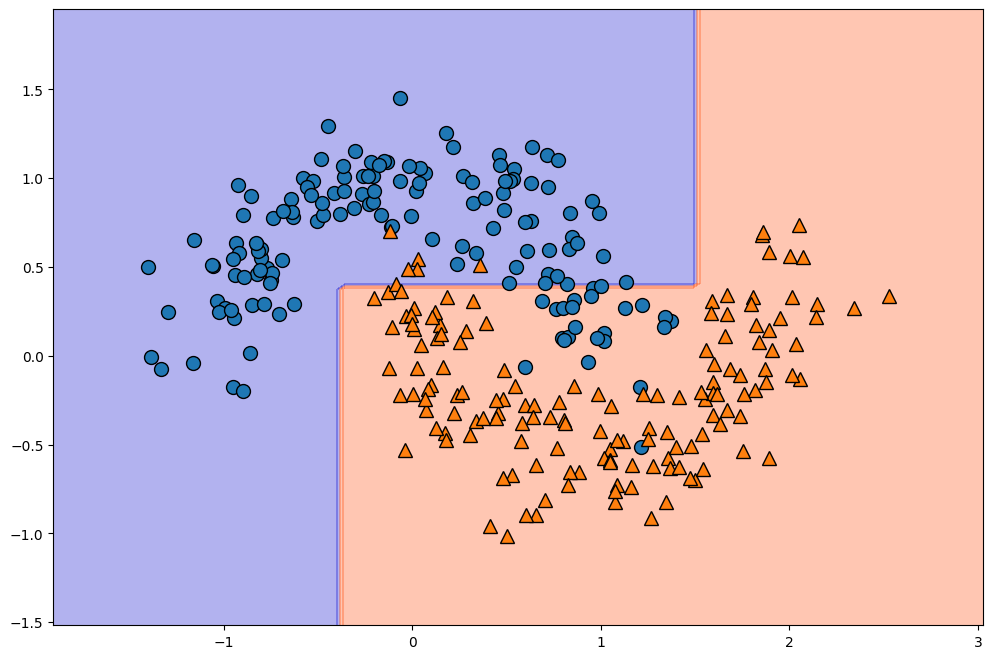

In [9]:
plt.figure(figsize=(12, 8))

import numpy as np

# linspaceは等差数列を生み出す
_x1 = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
_x2 = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

# meshgridは格子点を作る
x1, x2 = np.meshgrid(_x1, _x2)
X_stack = np.hstack((x1.ravel().reshape(-1, 1), x2.ravel().reshape(-1, 1)))
y_pred = clf_model.predict(X_stack).reshape(x1.shape)
custom_cmap = ListedColormap(['mediumblue', 'orangered'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.show()

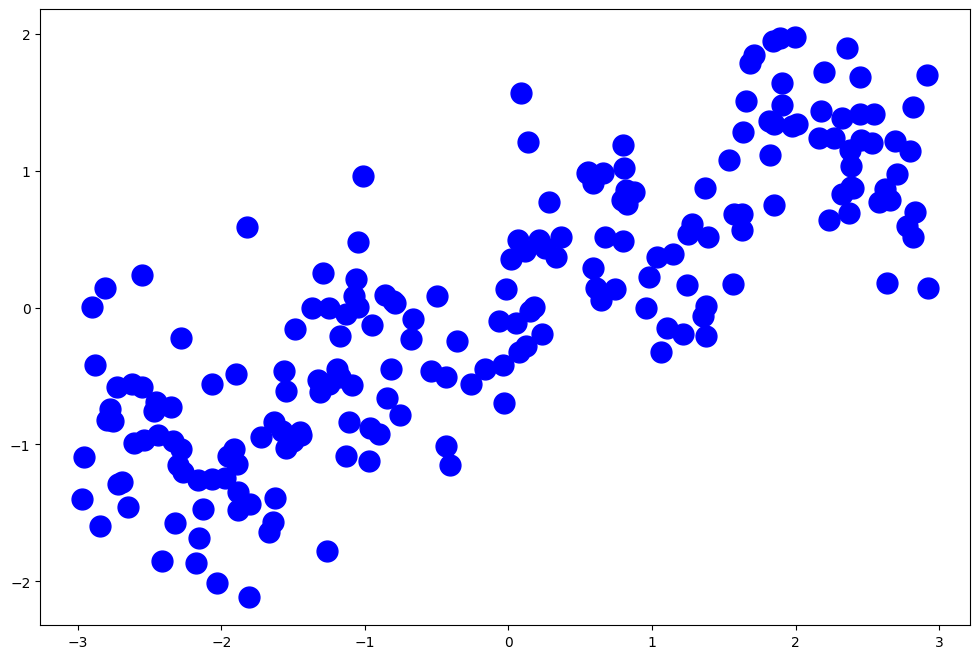

In [10]:
# 回帰木の実装

import mglearn
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

X, Y = mglearn.datasets.make_wave(n_samples=200)

plt.figure(figsize=(12, 8))
plt.plot(X, Y, 'bo', ms=15)
plt.show()

In [11]:


tree_reg_model = DecisionTreeRegressor(max_depth=3)
tree_reg_model.fit(X, Y)
print(tree_reg_model.score(X, Y))

0.7755211625482443


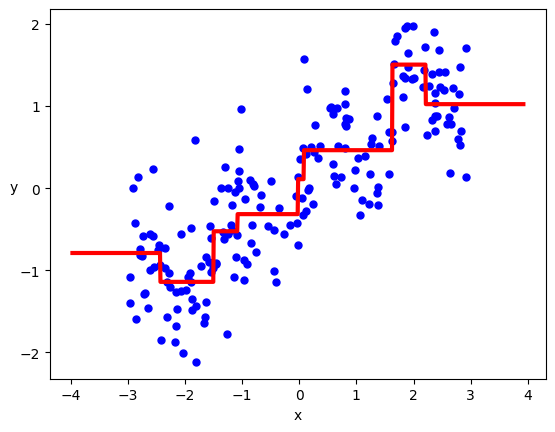

In [15]:
X1 = np.linspace(X.min() - 1, X.max() + 1, 1000).reshape(-1, 1)
y_pred = tree_reg_model.predict(X1)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10, rotation=-0)
plt.plot(X, Y, 'bo', ms=5)
plt.plot(X1, y_pred, 'r-', linewidth=3)
plt.show()

In [16]:
import mglearn
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

X, Y = mglearn.datasets.make_wave(n_samples=200)

tree_reg_model_2 = DecisionTreeRegressor()

tree_reg_model_2.fit(X, Y)

print(tree_reg_model_2.score(X, Y))

1.0


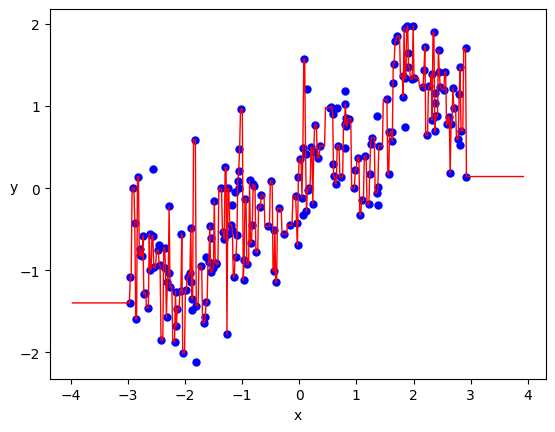

In [17]:
def plot_regression_predictions(tree_reg, x, y):
    x1 = np.linspace(x.min() - 1, x.max() + 1, 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.xlabel('x', fontsize=10)
    plt.ylabel('y', fontsize=10, rotation=-0)
    plt.plot(x, y, 'bo', ms=5)
    plt.plot(x1, y_pred, 'r-', linewidth=1)
    plt.show()


plot_regression_predictions(tree_reg_model_2, X, Y)